# ***Ciencia de Datos***

## ***Proyecto*: "Análisis de los atletas mejor pagados del mundo"**


*   **CAMPOS CANCHÉ SANTIAGO ANDRÉS** 
*   **MORALES VELARDE DANIELA PATRICIA**
*   **OCAMPO GARCÍA VICTOR EMMANUEL MIGUEL ÁNGEL**

### ***Objetivo:*** 
*   Analizar y resolver los cuestionamientos planteados en el proyecto, utilizando las técnicas de **EXTRACCIÓN**, **LIMPIEZA** y **VISUALIZACIÓN** de datos.





# **Importar paqueterías y el dataset**

Importamos las librerías requeridas para el análisis de la información

In [ ]:
import numpy as np 
import pandas as pd 
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
!pip install pycountry
!pip install -U kaleido
import pycountry
import folium 
from folium import plugins
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis 

import numpy as np
from PIL import Image
import plotly.express as px


import matplotlib.ticker as ticker
import matplotlib.colors as colors
import matplotlib.animation as animation
from IPython.display import HTML

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5


# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
from google.colab import files
 
 
uploaded = files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00


KeyboardInterrupt: ignored

Cargamos la base de datos 

In [ ]:
forbes = pd.read_csv('Forbes_a.csv')

Antes de ver las variables de la base de datos, nos interesa saber cuales son sus dimensiones

In [ ]:
forbes.shape

(301, 8)

Obtenemos información de las variables que conforman la base

In [ ]:
forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


# **LIMPIEZA DE DATOS**

Al observar de inicio la base, podemos ver que se necesita realizar una limpieza en los datos.



1.   Eliminaremos la columna ***S.NO*** dado que se trata de una columna índice que no es relevante en nuestro análisis.

2.   Podemos ver que en la columna ***Previous Year Rank*** tenemos algunos datos nulos y con diversos formatos. Para solucionar esto, tomaremos algunas consideraciones que especificaremos más adelante y así homologar la información de esta columna.

3.   En la columna ***Sport*** se encuentran todos los deportes involucrados en esta base; en primer lugar cambiaremos todo a mayúsculas para tener un sólo deporte sin importar su escritura inicial. Además pudimos notar que hay categorías de los deportes que se basan en la marca o liga en la que juegan los deportistas, y dado que este análisis se enfocará sólo en el tipo de deporte, tomaremos algunas consideraciones para agruparlos de acuerdo al tipo de deporte y no al de la liga.

4.   Para la columna ***Year*** haremos sólo un cambio en el tipo de dato para que sea considerada como un fecha, considerando sólo el año. 

***NOTA:*** Estos cambios los realizaremos en una nueva copia del DataFrame al que llamaremos **forbes1**.





In [ ]:
#Creamos la copia de la base
forbes1 = forbes.copy()

In [ ]:
#Eliminamos la columna "S.NO", pues solo nos enumera las filas de los datos del dataset
forbes1.drop('S.NO', axis=1, inplace=True)

Realizamos los ajustes de la columna **"Previous Year Rank"**, así que primero vemos las categorías que toman estos datos.

In [ ]:
forbes1["Previous Year Rank"].value_counts() 

>10           36
1             25
5             21
3             21
2             20
6             18
7             17
4             17
8             14
9             13
10             8
11             6
>100           6
>40            6
13             4
12             4
not ranked     4
>20            4
17             3
19             3
?              3
20             3
18             2
24             2
??             2
14             2
15             2
30             2
>30            2
26             1
none           1
38             1
40             1
21             1
>14            1
22             1
Name: Previous Year Rank, dtype: int64

Agrupamos de acuerdo a nuestras consideraciones, entonces tomamos algunos datos en una variable llamada 'not ranked' a aquellos valores que tenían signos no númericos y los nulos. Mientras que para los valores con mayor que, los fijamos en el valor númerico que indica la variable.

In [ ]:
#Agrupamos de acuerdo a nuestras consideraciones
forbes1["Previous Year Rank"].replace({'none': 'not ranked', '??':'not ranked', '?':'not ranked','>10':10,'>14':14,'>20':20,'>30':30,'>40':40,'>100':100}, inplace=True)
forbes1['Previous Year Rank'].fillna('not ranked', inplace = True)
#Mostramos las categorías nuevas ''
forbes1["Previous Year Rank"].value_counts()

10            36
not ranked    34
1             25
5             21
3             21
2             20
6             18
7             17
4             17
8             14
9             13
10             8
100            6
40             6
11             6
20             4
12             4
13             4
19             3
17             3
20             3
30             2
15             2
14             2
18             2
30             2
24             2
40             1
22             1
38             1
26             1
21             1
14             1
Name: Previous Year Rank, dtype: int64

Realizamos los ajustes de la columna **"Sport"** para no tener problemas al momento de trabajar con ella.

In [ ]:
#Convertimos a mayúsculas todos los deportes 
forbes1['Sport'] = forbes1['Sport'].str.upper()

#Observamos las diversas categorías de deportes que tenemos
forbes1["Sport"].value_counts()

BASKETBALL                      81
BOXING                          46
GOLF                            44
SOCCER                          33
TENNIS                          23
AUTO RACING                     18
AMERICAN FOOTBALL               17
F1 RACING                        8
BASEBALL                         6
F1 MOTORSPORTS                   5
MOTORCYCLE GP                    4
NASCAR                           3
ICE HOCKEY                       3
NFL                              3
AUTO RACING (NASCAR)             2
AMERICAN FOOTBALL / BASEBALL     1
HOCKEY                           1
NBA                              1
CYCLING                          1
MMA                              1
Name: Sport, dtype: int64

Agrupamos los deportes, pues como podemos ver en la parte anterior, tenemos varios que podemos tomar como una sola categoría, además de hacer un poco de investigación para el dato que tenía dos deportes como podemos ver en el siguiente código.

In [ ]:
#Agrupamos de acuerdo a nuestras consideraciones
forbes1["Sport"].replace({'NBA': 'BASKETBALL', 'F1 RACING':'AUTO RACING','F1 MOTORSPORTS':'AUTO RACING','NASCAR':'AUTO RACING','AUTO RACING (NASCAR)':'AUTO RACING','NFL': 'AMERICAN FOOTBALL','AMERICAN FOOTBALL / BASEBALL': 'AMERICAN FOOTBALL','ICE HOCKEY': 'HOCKEY'}, inplace=True)
forbes1["Sport"].value_counts()

#deporte = forbes1['Sport'] == 'AMERICAN FOOTBALL / BASEBALL'
#filt1 = forbes1[deporte]
#atleta = forbes1['Name'] == 'Deion Sanders'
#filt2 = forbes1[atleta]
#https://www.septimaentrada.com/mlb/deion-sanders-serie-mundial-mlb-super-bowl-nfl

BASKETBALL           82
BOXING               46
GOLF                 44
AUTO RACING          36
SOCCER               33
TENNIS               23
AMERICAN FOOTBALL    21
BASEBALL              6
HOCKEY                4
MOTORCYCLE GP         4
CYCLING               1
MMA                   1
Name: Sport, dtype: int64

Realizamos los ajustes de la columna **"Year"**


In [ ]:
forbes1['Year'] = pd.to_datetime(forbes1['Year'],format='%Y').dt.year

Así es como terminamos la limpieza general de los datos, entonces observemos la información de nuestra copia y algunos datos de la misma.

In [ ]:
forbes1.info()
forbes1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    301 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,not ranked,BOXING,1990,28.6
1,Buster Douglas,USA,2,not ranked,BOXING,1990,26.0
2,Sugar Ray Leonard,USA,3,not ranked,BOXING,1990,13.0
3,Ayrton Senna,Brazil,4,not ranked,AUTO RACING,1990,10.0
4,Alain Prost,France,5,not ranked,AUTO RACING,1990,9.0


# 1. Deportistas cuyo ranking ha subido al menos dos lugares en los años 2010 y 2020.

Lo que realizaremos para lograr contestar esta pregunta es crear dos tablas, una en donde coloquemos todos los datos con el año 2010, después una con el año 2020.

In [ ]:
# Tabla con los datos en el año 2010
anio2010 = forbes1[forbes1.Year.isin([2010])]
# Seleccionamos las columnas que son de nuestro interés para contestar la pregunta
anio2010 = anio2010.loc[:, ['Name', 'Current Rank', 'Year']] 
# Vemos algunos datos de esta tabla
anio2010.head(2)

,Name,Current Rank,Year
191,Tiger Woods,1,2010
192,Floyd Mayweather,2,2010


In [ ]:
# Tabla con los datos en el año 2020
anio2020 = forbes1[forbes1.Year.isin([2020])]
# Seleccionamos las columnas que son de nuestro interés para contestar la pregunta
anio2020 = anio2020.loc[:, ['Name', 'Current Rank', 'Year']] 
# Vemos algunos datos de esta tabla
anio2020.head(2)

,Name,Current Rank,Year
291,Roger Federer,1,2020
292,Cristiano Ronaldo,2,2020


Ahora que ya tenemos las tablas con ambos datos, nos interesa saber cuales son los datos que aparecen en ambas tablas, por lo que tendremos que realizar un inner join

In [ ]:
anios_10_y_20 = pd.merge(anio2010, anio2020, on='Name', how='inner')
# Cambiamos el nombre de las columnas de los Rankings
anios_10_y_20 = anios_10_y_20.rename(columns = {'Current Rank_x':'Rank 2010', 'Current Rank_y':'Rank 2020'})
# Eliminamos las columnas de los años
anios_10_y_20 =anios_10_y_20.drop(['Year_x', 'Year_y'], axis=1)

# Vemos los datos del inner join con las modificaciones
anios_10_y_20

,Name,Rank 2010,Rank 2020
0,Tiger Woods,1,8
1,Roger Federer,6,1
2,LeBron James,7,5


Ahora lo que nos interesa saber es si subieron al menos dos lugares en estos años

In [ ]:
# Hacemos la condición
suben2 = anios_10_y_20['Rank 2010']>=anios_10_y_20['Rank 2020']+2
# Llamamos a los valores que cumplen con la condición requerida
anios_10_y_20[suben2]

Por lo tanto vemos que los deportistas que subieron 2 lugares desde 2010 a 2020 son:



*   Roger Federer
*   LeBron James

Pero ahora veremos como se ve gráficamente el rank de los deportistas que se encuentran en los años de 2010 y 2020. 

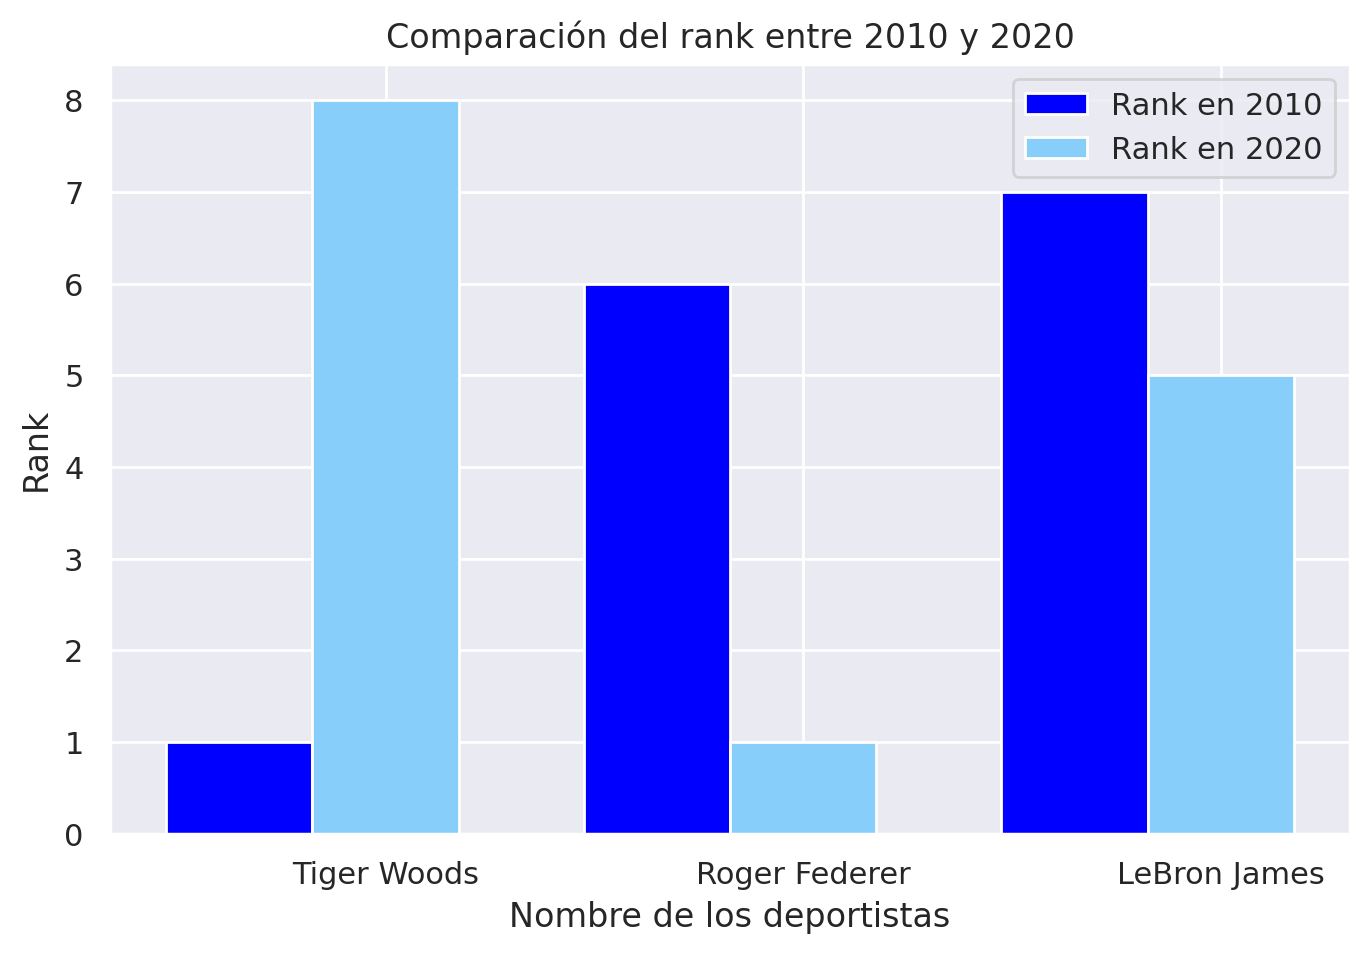

In [ ]:
# Vamos a realizar dos grupos por el que vamos a agrupar, que en este caso son los ranks de el año 2010 y 2020
rank10 = anios_10_y_20['Rank 2010']
rank20 = anios_10_y_20['Rank 2020']

#Comenzamos a configurar la gráfica
numero_grupos_p1 = len(rank10)
indice_barras_p1 = np.arange(numero_grupos_p1)
ancho_barras_p1 = 0.35

#Barras de 2010
plt.bar(indice_barras_p1, rank10, width=ancho_barras_p1, label='Rank en 2010', color = 'blue')
#Barras de 2020 y 2010
plt.bar(indice_barras_p1 + ancho_barras_p1, rank20 , width=ancho_barras_p1, label='Rank en 2020', color = 'lightskyblue')
plt.legend(loc='best')

# Se colocan los indicadores en el eje x
plt.xticks(indice_barras_p1 + ancho_barras_p1, ('Tiger Woods', 'Roger Federer', 'LeBron James'))
plt.ylabel('Rank')
plt.xlabel('Nombre de los deportistas')
plt.title('Comparación del rank entre 2010 y 2020')
 
plt.show()

Como podemos ver en la gráfica las barras que son más cortas representan a los que tienen un rank mejor, mientras que si la barra es más larga, el rank que tiene es peor. Por lo que Tigger Woods bajó su rank, Roger Federer subió su rank 5 lugares y LeBron James subió 2 lugares, en los años de 2010 y 2020

#2. Atleta con el menor número de apariciones y mayores ganancias.

Para esta pregunta realizamos dos tablas, una con el mínimo de entradas por nombre y otra, con el nombre y ganancias para después hacer un left join.

Primero realizaremos una nueva tabla con los nombres y las ganancias, además de que en esta tabla estaremos filtrando el número de apariciones igual a 1.

Creamos una copia del dataset, y llamamos a la columna de nombre y agregamos una más para llevar el conteo

In [ ]:
nomb_cont = forbes1.copy()
nomb_cont = nomb_cont.loc[:, ['Name']]
nomb_cont.insert(1, 'count','')
#Agrupamos los nombres y llenamos la columna del conteo
nomb_cont = nomb_cont.groupby(by='Name').agg('count')
#Reseteamos los indices de los datos para tener la tabla con ambas columnas
cont_min = nomb_cont.reset_index()
#Realizamos la condición de que aparezcan el mínimo de veces (1 vez)
cont_min = cont_min[cont_min['count'] == 1]
cont_min.head(5)

,Name,count
0,Aaron Rodgers,1
1,Aaron Rogers,1
5,Andrew Luck,1
8,Buster Douglas,1
9,Cam Newton,1


Ahora vamos a crear otra tabla en donde contegan los nombres de los atletas y sus ganancias

In [ ]:
nomb_ganan = forbes1.loc[:, ['Name', 'earnings ($ million)']]
nomb_ganan.rename(columns={'earnings ($ million)' : 'ganancias'}, inplace =True)
nomb_ganan = nomb_ganan.sort_values('ganancias', ascending=False)

nomb_ganan.head(5)

Ahora, como queremos las ganancias de los nombres que solo aparecen una vez, hacemos un left join para quedarnos con los nombres que queremos y llamar a las ganancias

In [ ]:
ganan_cont1 = pd.merge(cont_min,nomb_ganan,on='Name',how='left')
ganan_cont1 = ganan_cont1.sort_values('ganancias', ascending=False)
ganan_cont1.head(2)

Por lo tanto el deportista con el menor número de apariciones y mayor ganancia es **Conor McGregor (99 millones)**. Pero veremos como se compara con los 15 que se encuentran con mayores ganancias y menor número de apariciones.

In [ ]:
#Declaramos el eje y
nomb_cont_min = ganan_cont1['Name'].head(15)
# Declaramos valores para el eje x, ahora son los valores
gan_cont_min = ganan_cont1['ganancias'].head(15)
 
## Creamos Gráfica y ponemos las barras de color azul

plt.barh(nomb_cont_min, gan_cont_min, color=["mediumslateblue", "mediumblue" , "navy"])
plt.ylabel('Nombre de atletas')
plt.xlabel('Ganancias por millon')
plt.title('Atletas con el menor número de apariciones y mayores ganancias.')
plt.show()

Como podemos ver finalmente en esta gráfica los dos atletas con mayores ganancias, se encuentran muy cerca, siendo Connor McGregor el atleta con mayores ganancias y una sola aparición en la tabla, seguido del Canelo Alvarez.

# 3. Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.

Filtraremos nuestra base para quedarnos solo con los atletas no rankeados, después crearemos una tabla para agruparlos por país y deporte.

In [ ]:
#Filtramos nuestra base para quedarnos sólo con los atletas No Rankeados
no_rank = forbes1[forbes1['Previous Year Rank'] == 'not ranked']

#Eliminamos los atletas No Rankeados que tengamos duplicados (en diferentes años)
no_rank = no_rank.drop_duplicates(subset=['Name'])

#Hacemos un conteo para agrupar a los atletas No Rankeados por Nacionalidad y Deporte
no_rank = no_rank.groupby(by=['Nationality','Sport']).size()
no_rank

Nationality  Sport            
Australia    GOLF                 1
Brazil       AUTO RACING          1
Canada       HOCKEY               1
France       AUTO RACING          1
Germany      AUTO RACING          1
Russia       HOCKEY               1
UK           AUTO RACING          1
USA          AMERICAN FOOTBALL    6
             AUTO RACING          1
             BASEBALL             1
             BASKETBALL           6
             BOXING               7
             GOLF                 3
dtype: int64

Creamos una tabla en formato wide para hacer más visible cuál es la Nacionalidad y Deporte con mayor número de No Rankeados

In [ ]:
no_rank = no_rank.reset_index()
no_rank = pd.pivot_table(no_rank, columns = "Sport", index='Nationality', values=0)
no_rank.fillna(0, inplace = True)

no_rank

Sport,AMERICAN FOOTBALL,AUTO RACING,BASEBALL,BASKETBALL,BOXING,GOLF,HOCKEY
Nationality,,,,,,,
Australia,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Brazil,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,1.0
France,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Germany,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,1.0
UK,0.0,1.0,0.0,0.0,0.0,0.0,0.0
USA,6.0,1.0,1.0,6.0,7.0,3.0,0.0


Finalmente mostramos en un gráfico el número de atletas no rankeados por país y deporte.



<Axes: title={'center': '# Atletas NO RANKEADOS por País y Deporte'}, ylabel='Nationality'>

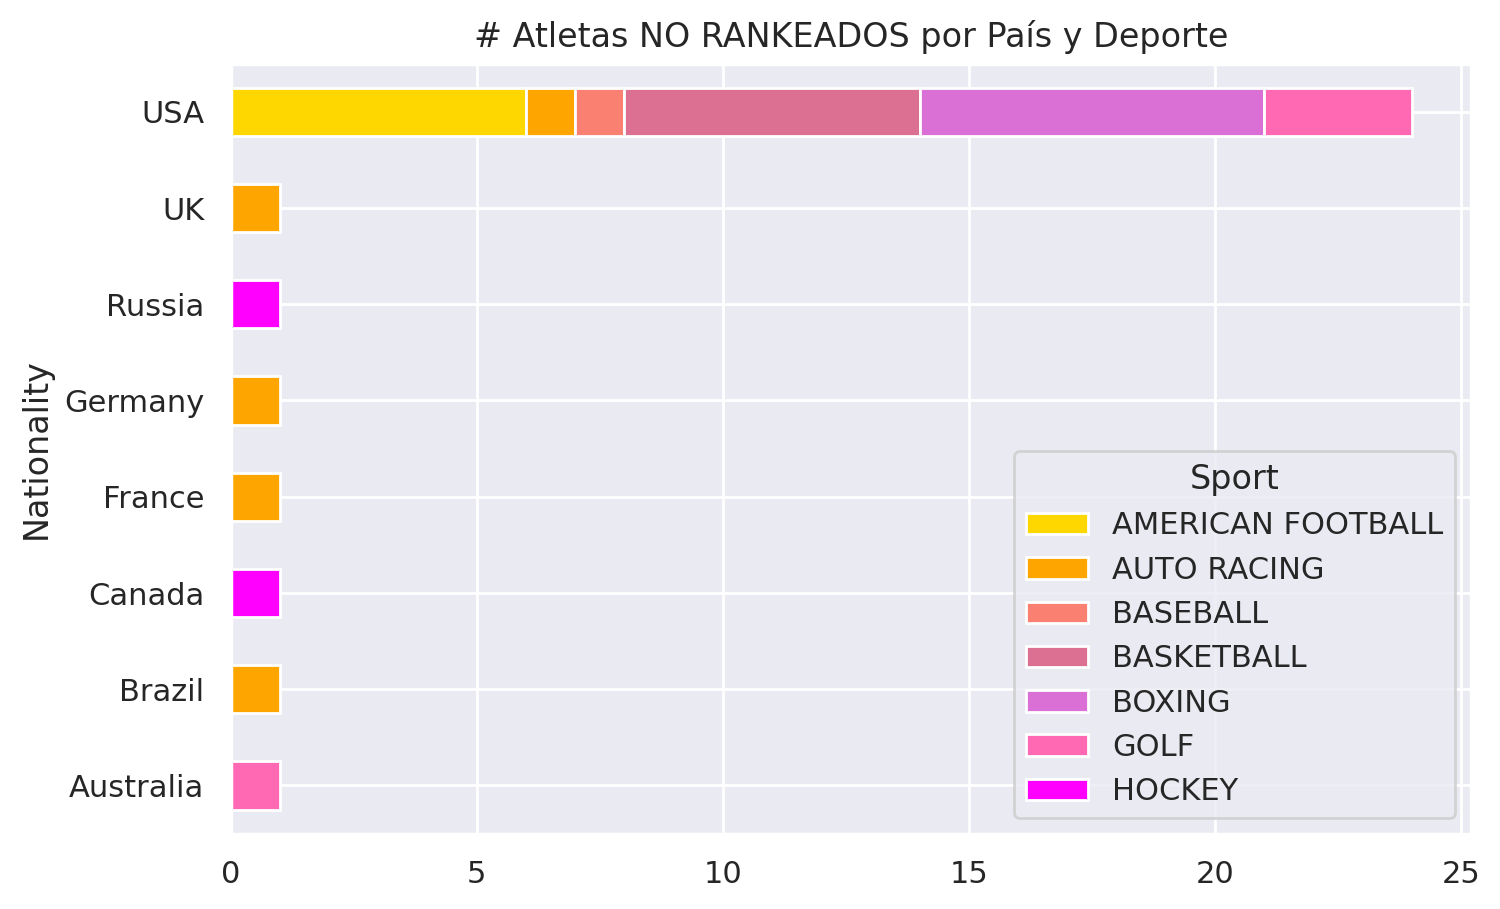

In [ ]:
#Hacemos una gráfica de Barras apiladas
color_p3 = ['gold' , 'orange' ,  'salmon', 'palevioletred', 'orchid', 'hotpink', 'magenta']
no_rank.plot(kind='barh', title ='# Atletas NO RANKEADOS por País y Deporte', stacked= True, color = color_p3)

Por lo tanto, podemos ver con ayuda de la tabla y la gráfica, que el País donde hay mayor número de atletas No Rankeados y que están dentro de la lista de mejores pagados, es ***USA*** y, en particular, en el deporte de ***BOXING*** al tener a 7 atletas dentro de esta agrupación.

#4. Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

Seleccionamos las columnas de interes, agrupamos por país y deporte, y calculamos el mínimo y máximo de ganancias.

In [ ]:
preg_6 = forbes1.loc[:, ['Sport', 'Nationality', 'earnings ($ million)']]
preg_6.sort_values('earnings ($ million)')
preg_6.rename(columns={'Sport':'Deporte','Nationality':'Pais','earnings ($ million)':'Ganancias'}, inplace = True)

millones_deporte_pais = preg_6.groupby(by=['Pais','Deporte'])["Ganancias"].agg(Minimo="min", Maximo="max")
millones_deporte_pais

Minimo  Maximo
Pais             Deporte                          
Argentina        SOCCER               32.3   127.0
Australia        GOLF                  8.5     8.5
Austria          AUTO RACING          13.5    13.5
Brazil           AUTO RACING          10.0    22.0
                 SOCCER               31.0   105.0
Canada           AUTO RACING          20.0    23.0
                 BOXING               10.2    10.2
                 HOCKEY               13.5    17.9
Dominican        BASEBALL             35.0    35.0
Filipino         BOXING               62.0    62.0
Finland          AUTO RACING          40.0    45.0
France           AUTO RACING           9.0    16.0
Germany          AUTO RACING          15.0    80.0
Ireland          MMA                  99.0    99.0
Italy            MOTORCYCLE GP        28.0    35.0
Mexico           BOXING               94.0    94.0
Northern Ireland GOLF                 50.0    50.0
Philippines      BOXING               40.0   160.0
Portugal         SOCCER               38.0   109.0
Russia           HOCKEY               29.8    29.8
Serbia           TENNIS               55.8    55.8
Spain            TENNIS               44.5    44.5
Switzerland      TENNIS               35.0   106.3
UK               AUTO RACING           9.0    46.0
                 SOCCER               28.0    50.0
USA              AMERICAN FOOTBALL     9.5    89.5
                 AUTO RACING          19.1    34.0
                 BASEBALL             12.7    29.0
                 BASKETBALL            8.1    89.0
                 BOXING                8.1   300.0
                 CYCLING              28.0    28.0
                 GOLF                  8.1   115.0
                 TENNIS                8.5    28.2

Como podemos ver tenemos muchos mínimos y máximos iguales, pues solo tenemos ese deporte y en el país indicado, por ello el mínimo y el máximo son los mismos. Podemos filtrar la base cuando el mínimo de ganancias y el máximo son diferentes.

In [ ]:
#Reseteamos los índices
diferentes = millones_deporte_pais.reset_index()
#Filtramos 
diferentes = diferentes[diferentes['Minimo'] != diferentes['Maximo']]
diferentes

,Pais,Deporte,Minimo,Maximo
0,Argentina,SOCCER,32.3,127.0
3,Brazil,AUTO RACING,10.0,22.0
4,Brazil,SOCCER,31.0,105.0
5,Canada,AUTO RACING,20.0,23.0
7,Canada,HOCKEY,13.5,17.9
10,Finland,AUTO RACING,40.0,45.0
11,France,AUTO RACING,9.0,16.0
12,Germany,AUTO RACING,15.0,80.0
14,Italy,MOTORCYCLE GP,28.0,35.0
17,Philippines,BOXING,40.0,160.0


En esta última tabla, tenemos los paises, deportes con mayores y menores ganancias que son distintos. Entonces esta tabla la graficaremos para ver la comparación entre los mínimos y máximos.

Primero veremos los valores que toma "Pais" para abreviar los países

In [ ]:
diferentes['Pais'].value_counts()

USA            7
Brazil         2
Canada         2
UK             2
Argentina      1
Finland        1
France         1
Germany        1
Italy          1
Philippines    1
Portugal       1
Switzerland    1
Name: Pais, dtype: int64

In [ ]:
# Abreviamos
diferentes['Pais abreviado'] = diferentes['Pais']
diferentes['Pais abreviado'].replace({'Brazil':'BR', 
                            'Canada':'CA', 
                            'Argentina':'AR', 
                            'Finland':'FI', 
                            'France':'FR', 
                            'Germany':'DE',
                            'Italy': 'IT',
                            'Philippines': 'PH',
                            'Portugal': 'PT',
                            'Switzerland':'CH'}, inplace = True)
#https://traduciresdescubrir.wordpress.com/2012/07/26/paises-y-abreviaturas/

#Juntamos en una nueva columna el país abrevidado y el deporte
diferentes['Pais Deporte'] = diferentes["Pais abreviado"] + " " + diferentes["Deporte"]

Ahora si con estas modificaciones lo que haremos será una gráfica de barras comparando el mínimo y el máximo para cada país y deporte

<Axes: title={'center': 'Ganancias (millones) mínimas y máximas por deporte y país'}, ylabel='Pais Deporte'>

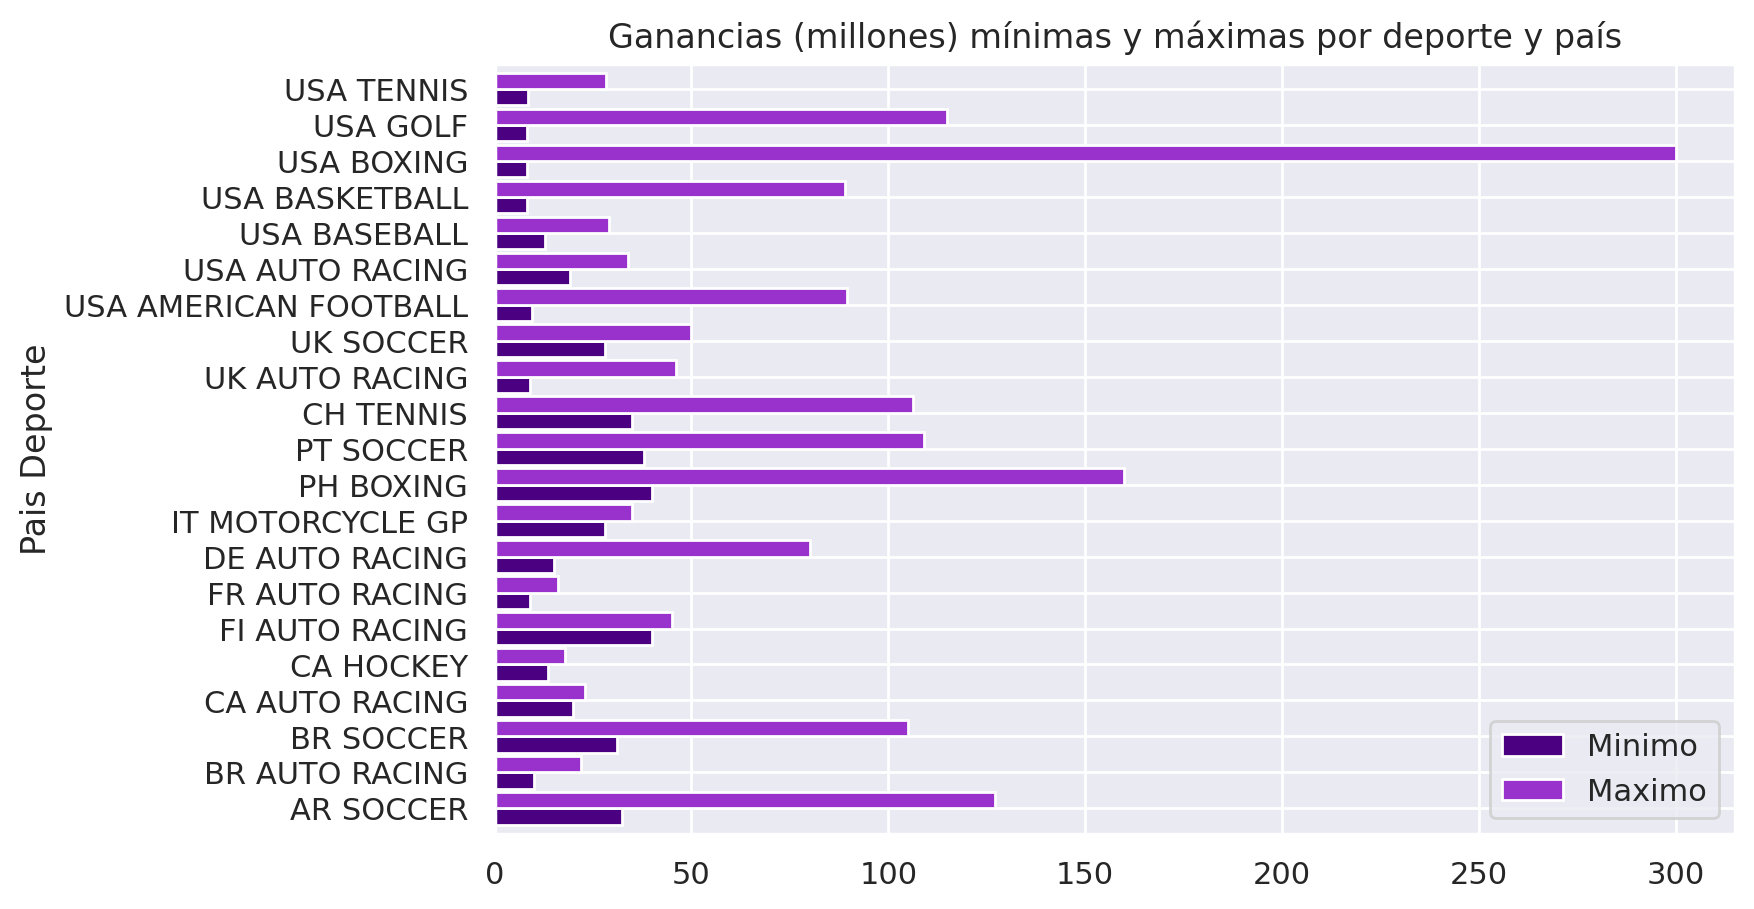

In [ ]:
diferentes.plot(kind = 'barh',
                x='Pais Deporte',
                color=['indigo', 'darkorchid'],
                width = 0.9,
                title = 'Ganancias (millones) mínimas y máximas por deporte y país')

Vemos que Estados Unidos con el deporte de boxeo se tiene la mayor ganancia por país y deporte en todo el dataset. Pero los mínimos no se ven muy claros cuales son los países y deportes con menores ganancias por lo que decidimos mostrar una gráfica más en donde solo mostremos los mínimos.

<Axes: title={'center': 'Ganancias (millones) mínimas por deporte y país'}, ylabel='Pais Deporte'>

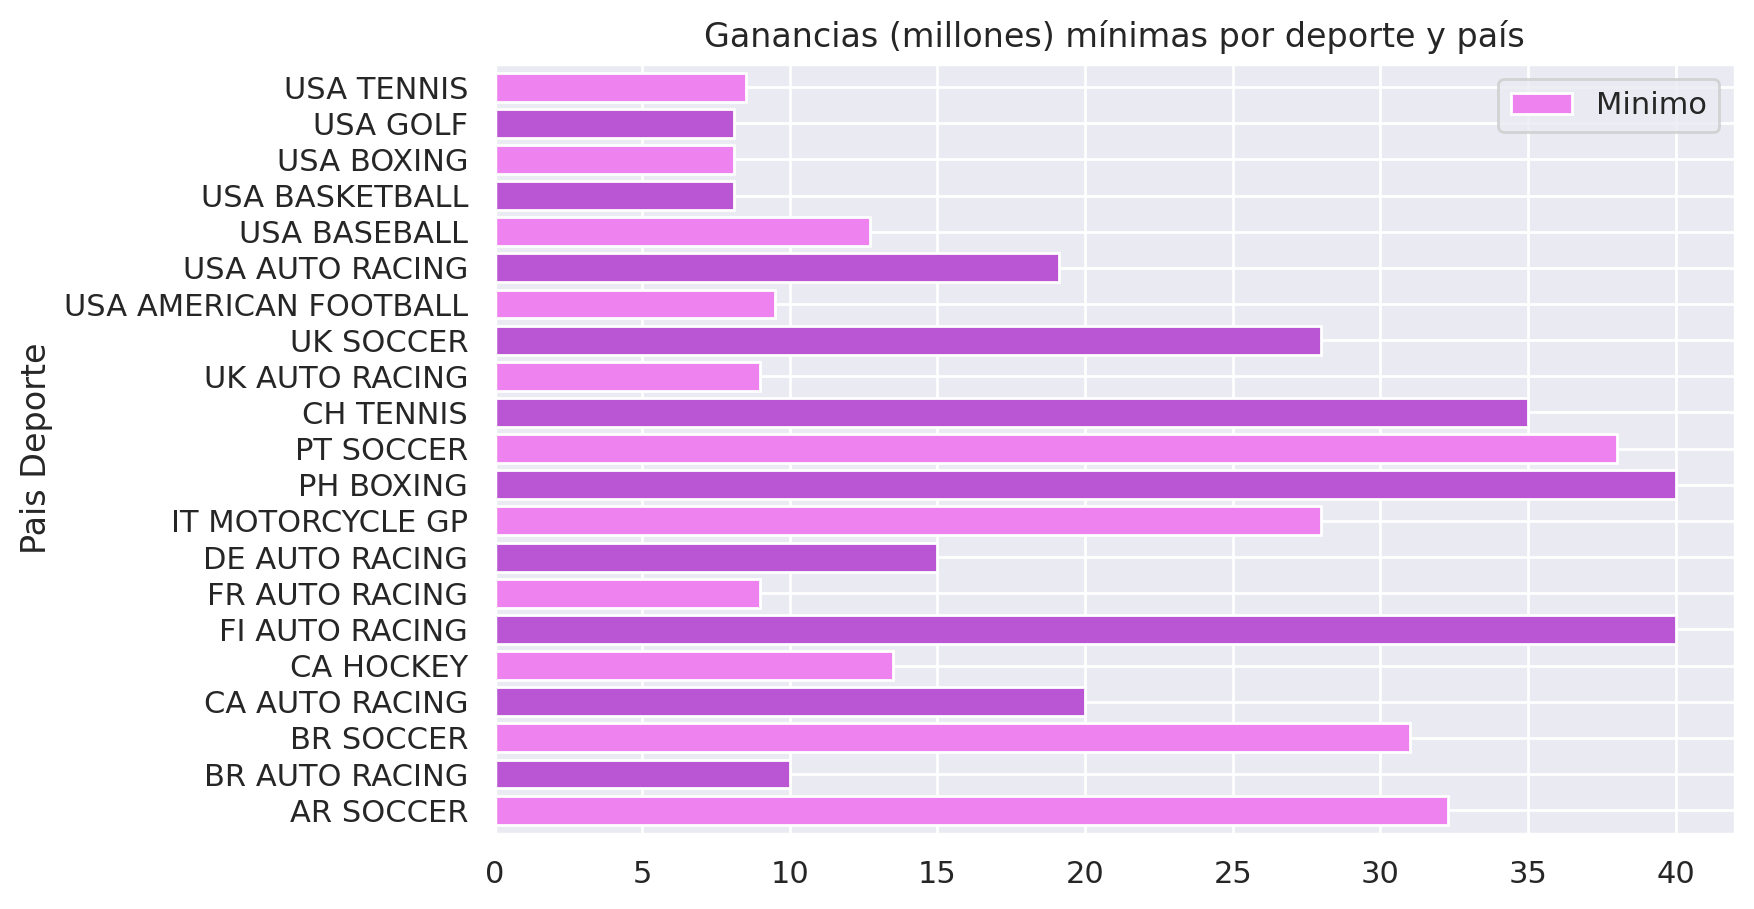

In [ ]:
diferentes.plot(kind = 'barh',
                x='Pais Deporte',
                y='Minimo',
                color=['violet', 'mediumorchid'],
                width = 0.8,
                title= 'Ganancias (millones) mínimas por deporte y país')

En esta última gráfica podemos ver un empate en el mínimo de ganancias con Estados Unidos y diferentes deportes: golf, boxing y basketball.

#5. Atleta con mayores ganancias por deporte por década
Creamos una nueva columna agrupando por década, después agrupamos por deporte y por década para sumar las ganancias de cada atleta.

In [ ]:
#Creamos una nueva base para agregar una nueva columna que llamaremos 'Decada'
preg_7 = forbes1.copy()

#Insertamos la nueva columna 'decada', que por ahora será una copia de la columna 'Year'
preg_7.insert(7,"Decada",forbes1['Year'],True)

#Eliminamos las columnas que NO necesitaremos de nuestra nueva base 'preg_7'
preg_7.drop(['Current Rank', 'Previous Year Rank', 'Year', 'Nationality'], axis=1, inplace=True)

#Renombramos la columna de 'Ganancias'
preg_7.rename(columns={'earnings ($ million)':'Ganancias'}, inplace = True)

#Para la nueva columna 'Decada', modificaremos sus valores para que muestre las décadas que tenemos (1990, 2000, 2010 y 2020)
preg_7["Decada"].replace({1991:1990, 1992:1990, 1993:1990, 1994:1990, 1995:1990, 1996:1990, 1997:1990, 1998:1990, 1999:1990,
                            2001:2000, 2002:2000, 2003:2000, 2004:2000, 2005:2000, 2006:2000, 2007:2000, 2008:2000, 2009:2000,
                            2011:2010, 2012:2010, 2013:2010, 2014:2010, 2015:2010, 2016:2010, 2017:2010, 2018:2010, 2019:2010}, inplace=True)
#Mostramos la nueva base 'preg_7' con los ajustes realizados
preg_7

,Name,Sport,Ganancias,Decada
0,Mike Tyson,BOXING,28.6,1990
1,Buster Douglas,BOXING,26.0,1990
2,Sugar Ray Leonard,BOXING,13.0,1990
3,Ayrton Senna,AUTO RACING,10.0,1990
4,Alain Prost,AUTO RACING,9.0,1990
...,...,...,...,...
296,Stephen Curry,BASKETBALL,74.4,2020
297,Kevin Durant,BASKETBALL,63.9,2020
298,Tiger Woods,GOLF,62.3,2020
299,Kirk Cousins,AMERICAN FOOTBALL,60.5,2020


Ahora filtraremos la base para que nos agrupe por 'Decada' y 'Deporte'; y nos sume las 'Ganancias' de cada atleta con esta nueva agrupación; oredenamos de mayor a menor 

In [ ]:
mayores_gan = preg_7.groupby(by=['Decada','Sport', 'Name']).Ganancias.sum().to_frame().sort_values(by=['Decada','Sport','Ganancias'], ascending = False)
mayores_gan = mayores_gan.reset_index()

#Finalmente, dejaremos sólo aquellos registros que correspondan a las MAYORES Ganancias por Década y Deporte
mayores_gan1 = mayores_gan.drop_duplicates(['Sport', 'Decada'])
mayores_gan1

,Decada,Sport,Name,Ganancias
0,2020,TENNIS,Roger Federer,106.3
1,2020,SOCCER,Cristiano Ronaldo,105.0
4,2020,GOLF,Tiger Woods,62.3
5,2020,BASKETBALL,LeBron James,88.2
8,2020,AMERICAN FOOTBALL,Kirk Cousins,60.5
10,2010,TENNIS,Roger Federer,639.8
13,2010,SOCCER,Cristiano Ronaldo,682.1
17,2010,MMA,Conor McGregor,99.0
18,2010,GOLF,Tiger Woods,429.3
22,2010,BOXING,Floyd Mayweather,840.0


Para tener una mejor vista, creamos 4 tablas para separar los atletlas por cada 'Década' y creamos una gráfica

## Atletas con mayores ganancias por deporte (Década 1990)

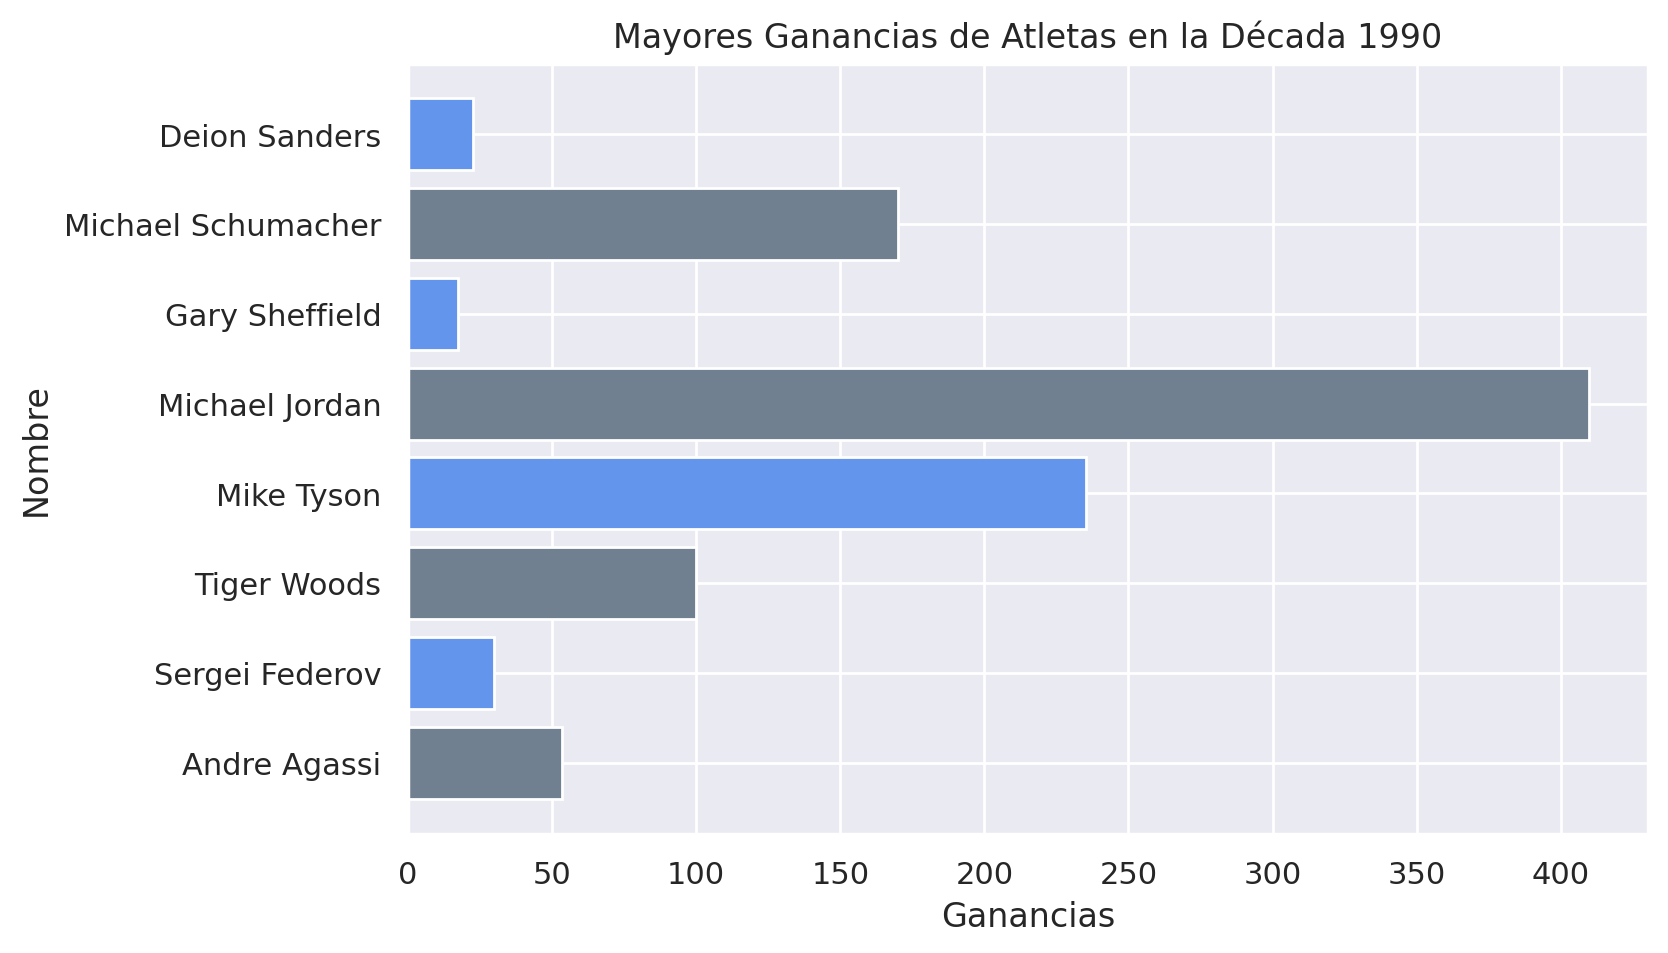

In [ ]:
#DECADA 1990
dec_1990 = mayores_gan1[mayores_gan1['Decada'] == 1990]
dec_1990

#GRÁFICA
#Ejes
eje_y90 = dec_1990['Name']
eje_x90 = dec_1990['Ganancias']
 
#Gráfico
plt.barh(eje_y90, eje_x90, color=['slategrey', 'cornflowerblue'])

#Etiquetas de los ejes
plt.ylabel('Nombre')
plt.xlabel('Ganancias')

#Título
plt.title('Mayores Ganancias de Atletas en la Década 1990')

plt.show()

## Atletas con mayores ganancias por deporte (Década 2000)

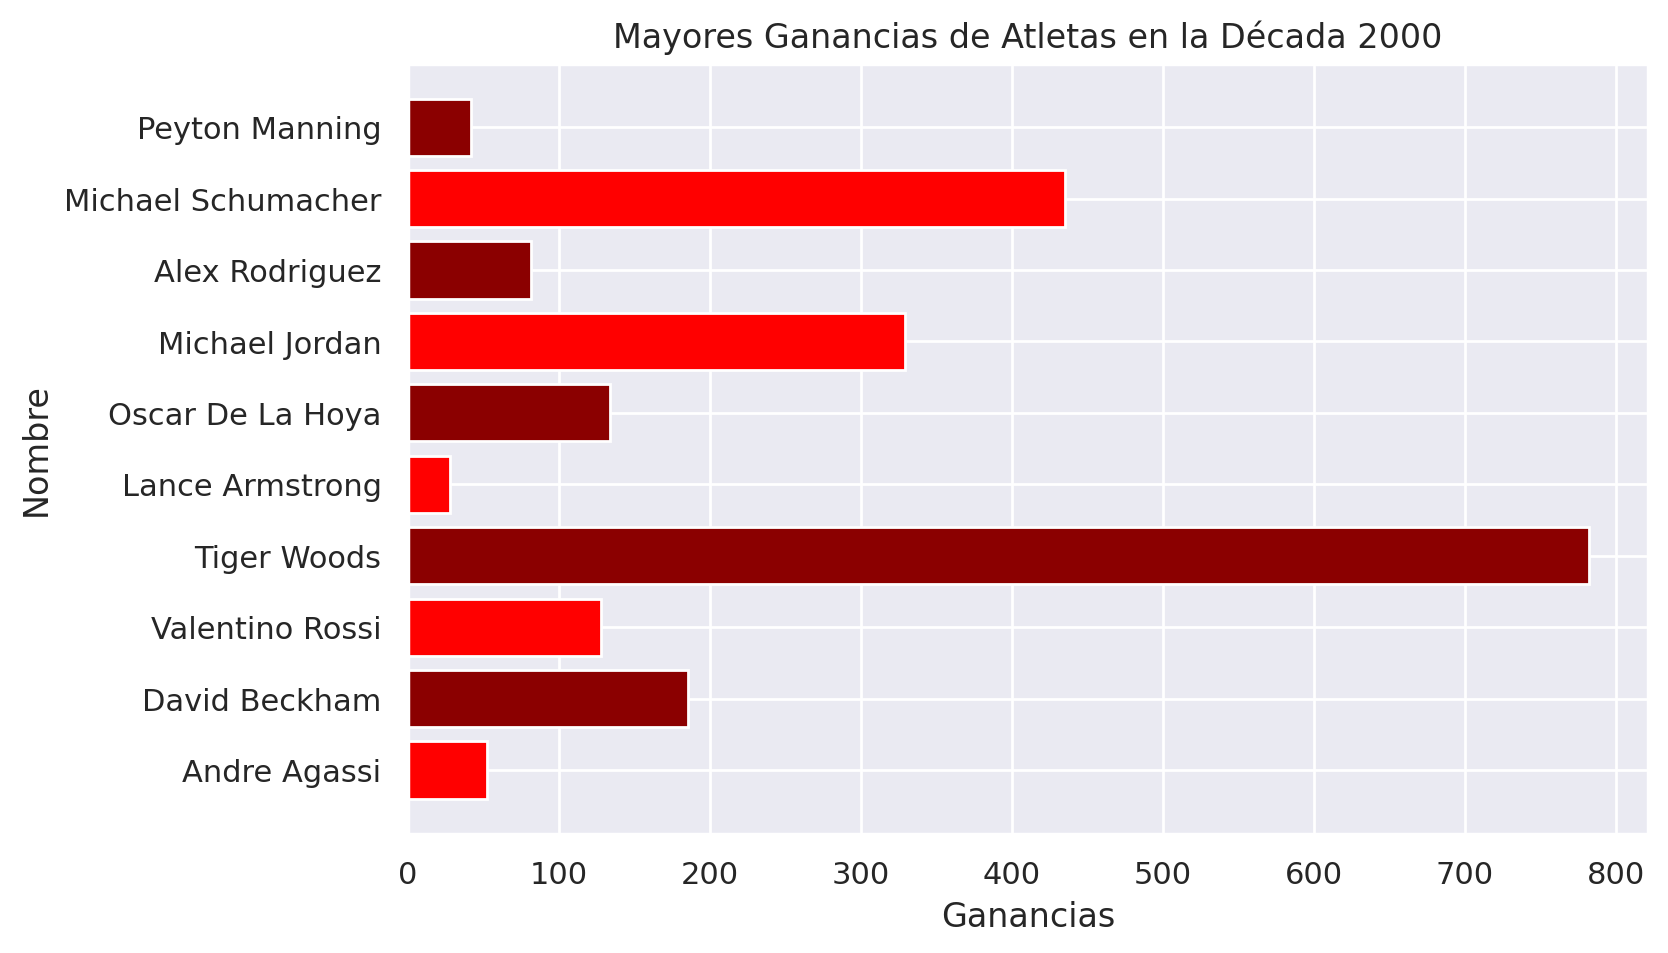

In [ ]:
#DECADA 2000
dec_2000 = mayores_gan1[mayores_gan1['Decada'] == 2000]
dec_2000

#GRÁFICA
#Ejes
eje_y00 = dec_2000['Name']
eje_x00 = dec_2000['Ganancias']
 
#Gráfico
plt.barh(eje_y00, eje_x00, color=['red','darkred'])

#Etiquetas de los ejes
plt.ylabel('Nombre')
plt.xlabel('Ganancias')

#Título
plt.title('Mayores Ganancias de Atletas en la Década 2000')

plt.show()

##Atletas con mayores ganancias por deporte (Década 2010)

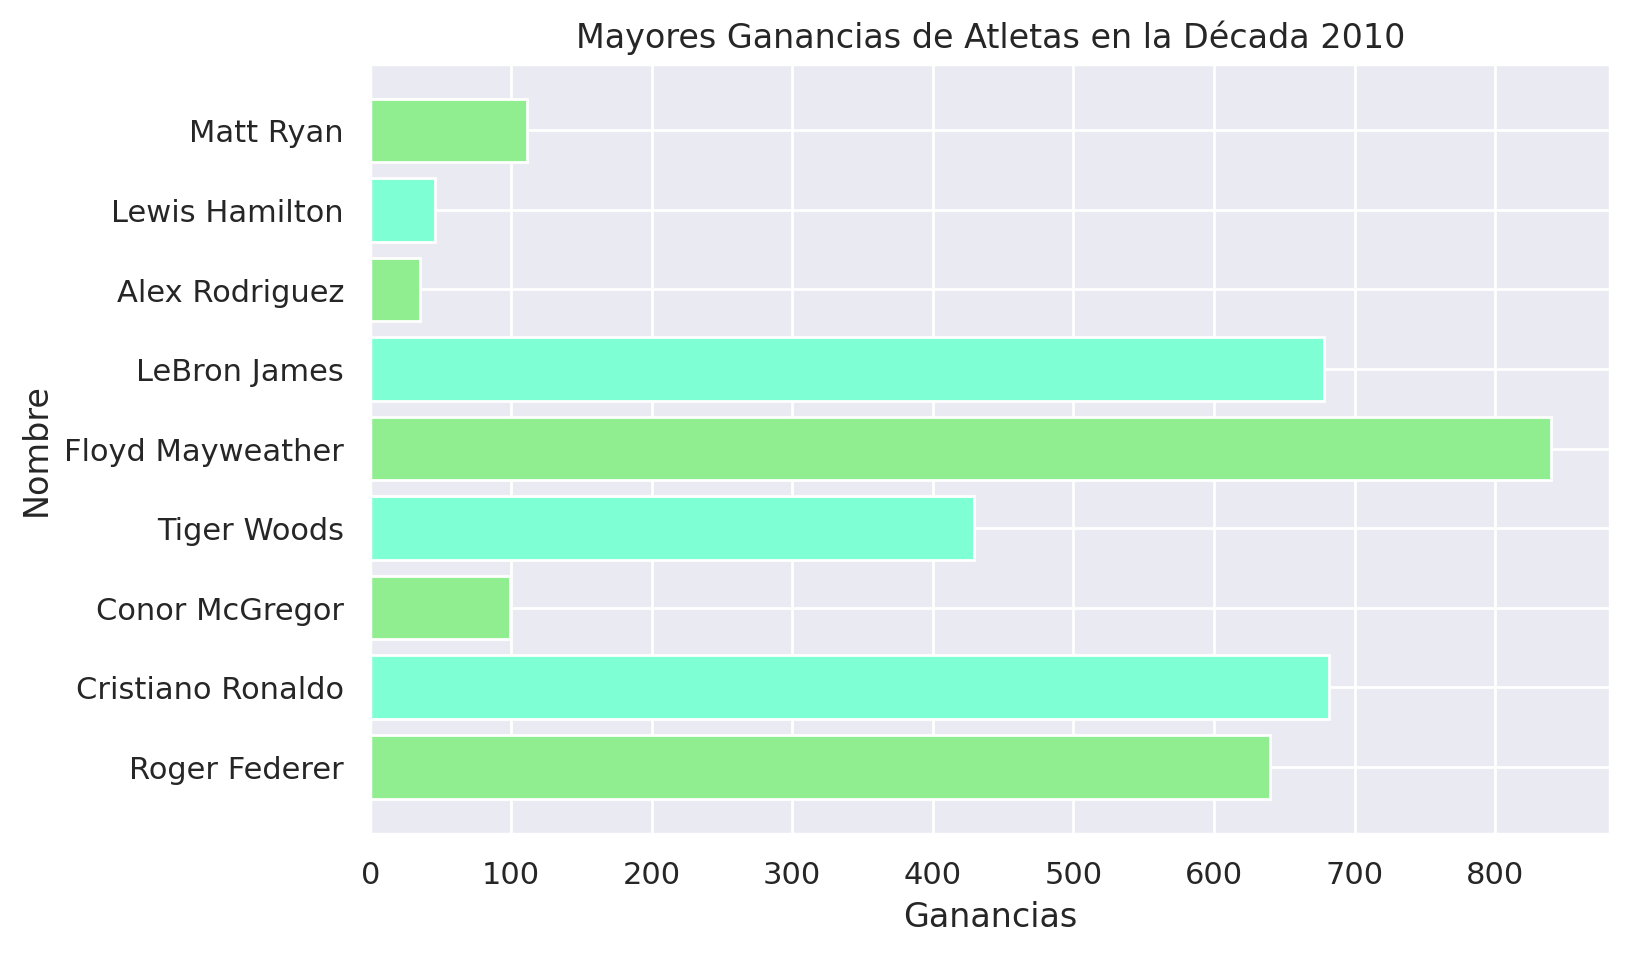

In [ ]:
#DECADA 2010
dec_2010 = mayores_gan1[mayores_gan1['Decada'] == 2010]
dec_2010

#GRÁFICA
#Ejes
eje_y10 = dec_2010['Name']
eje_x10 = dec_2010['Ganancias']
 
#Gráfico
plt.barh(eje_y10, eje_x10, color=['lightgreen', 'aquamarine'])

#Etiquetas de los ejes
plt.ylabel('Nombre')
plt.xlabel('Ganancias')

#Título
plt.title('Mayores Ganancias de Atletas en la Década 2010')

plt.show()

##Atletas con mayores ganancias por deporte (Década 2020)

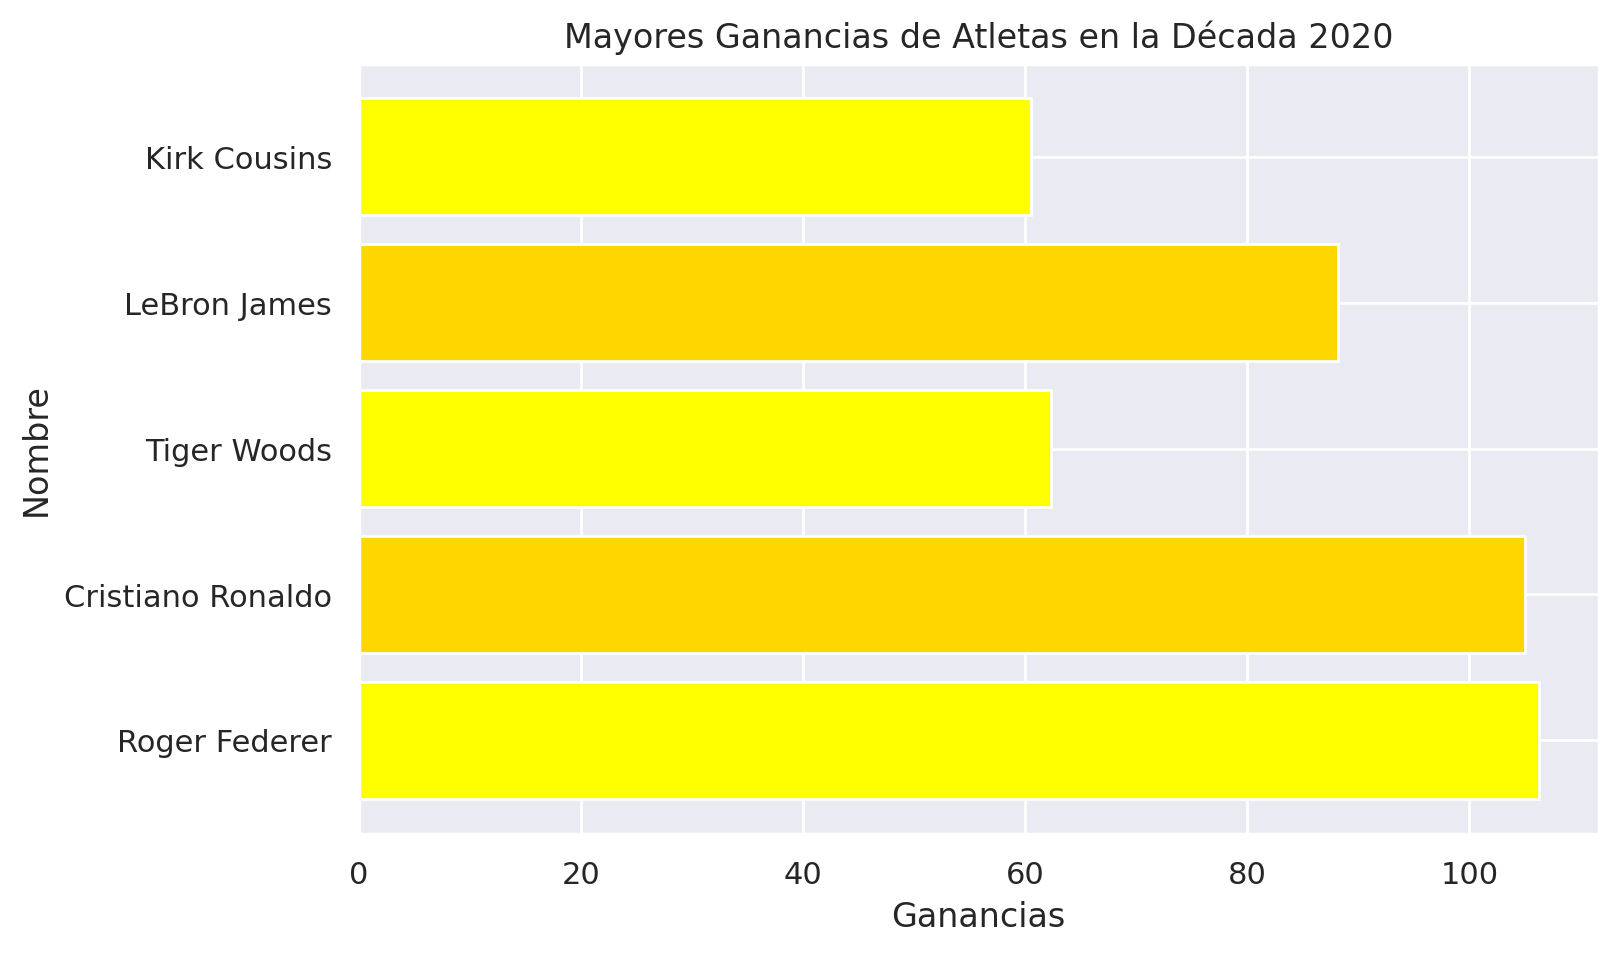

In [ ]:
#DECADA 2020
dec_2020 = mayores_gan1[mayores_gan1['Decada'] == 2020]
dec_2020

#GRÁFICA
#Ejes
eje_y20 = dec_2020['Name']
eje_x20 = dec_2020['Ganancias']
 
#Gráfico
plt.barh(eje_y20, eje_x20, color=["yellow", "gold"])

#Etiquetas de los ejes
plt.ylabel('Nombre')
plt.xlabel('Ganancias')

#Título
plt.title('Mayores Ganancias de Atletas en la Década 2020')

plt.show()

#6. Ganancia total por cada deporte por cada año.

Seleccionamos las columnas de interés para resolver esta pregunta, agrupamos por año, deporte y sumamos las ganancias.

In [ ]:
#Creamos una nueva base 
preg_8 = forbes1.copy()

#Eliminamos las columnas que NO necesitaremos de nuestra nueva base 'preg_8'
preg_8.drop(['Current Rank', 'Previous Year Rank', 'Name', 'Nationality'], axis=1, inplace=True)

#Renombramos las columnas
preg_8.rename(columns={'Sport':'Deporte','Year':'Año','earnings ($ million)':'Ganancias'}, inplace = True)

#Mostramos la nueva base 'preg_8' con los ajustes realizados
preg_8

,Deporte,Año,Ganancias
0,BOXING,1990,28.6
1,BOXING,1990,26.0
2,BOXING,1990,13.0
3,AUTO RACING,1990,10.0
4,AUTO RACING,1990,9.0
...,...,...,...
296,BASKETBALL,2020,74.4
297,BASKETBALL,2020,63.9
298,GOLF,2020,62.3
299,AMERICAN FOOTBALL,2020,60.5


Ahora filtraremos la base para que nos agrupe por 'Año' y 'Deporte'; y nos sume las 'Ganancias' de cada Deporte por Año 

In [ ]:
gan_total = preg_8.groupby(by=['Año','Deporte']).Ganancias.sum().to_frame()
gan_total.head(15)

Ganancias
Año  Deporte                     
1990 AUTO RACING             19.0
     BASKETBALL               8.1
     BOXING                  75.7
     GOLF                    25.2
1991 AUTO RACING             33.0
     BASKETBALL              16.0
     BOXING                 116.7
     GOLF                    17.8
1992 AMERICAN FOOTBALL        9.5
     AUTO RACING             36.5
     BASKETBALL              35.9
     BOXING                  28.0
     GOLF                    20.3
     TENNIS                  28.5
1993 AMERICAN FOOTBALL       11.5

Creamos una tabla en formato wide para hacer más visible las 'Ganancias Totales' por 'Deporte' y por 'Año'

In [ ]:
gan_total1 = gan_total.reset_index()
gan_total1 = pd.pivot_table(gan_total1, columns = "Deporte", index='Año', values='Ganancias')
gan_total1.fillna(0, inplace = True)

gan_total1

Deporte,AMERICAN FOOTBALL,AUTO RACING,BASEBALL,BASKETBALL,BOXING,CYCLING,GOLF,HOCKEY,MMA,MOTORCYCLE GP,SOCCER,TENNIS
Año,,,,,,,,,,,,
1990,0.0,19.0,0.0,8.1,75.7,0.0,25.2,0.0,0.0,0.0,0.0,0.0
1991,0.0,33.0,0.0,16.0,116.7,0.0,17.8,0.0,0.0,0.0,0.0,0.0
1992,9.5,36.5,0.0,35.9,28.0,0.0,20.3,0.0,0.0,0.0,0.0,28.5
1993,11.5,34.5,12.7,51.2,55.8,0.0,0.0,0.0,0.0,0.0,0.0,12.6
1994,0.0,24.8,0.0,46.7,24.1,0.0,28.4,13.5,0.0,0.0,0.0,11.4
1995,22.5,15.0,0.0,65.8,80.2,0.0,15.1,14.5,0.0,0.0,0.0,16.0
1996,16.5,33.0,0.0,102.8,90.5,0.0,15.1,0.0,0.0,0.0,0.0,15.2
1997,0.0,54.1,0.0,120.7,119.3,0.0,26.1,17.9,0.0,0.0,0.0,0.0
1998,0.0,62.1,17.2,108.9,18.5,0.0,44.9,29.8,0.0,0.0,0.0,0.0


Mostramos una vista general a los datos con la siguiente gráfica de barras.

<Axes: title={'center': 'Ganancias Totales por Deporte y por Año'}, ylabel='Año'>

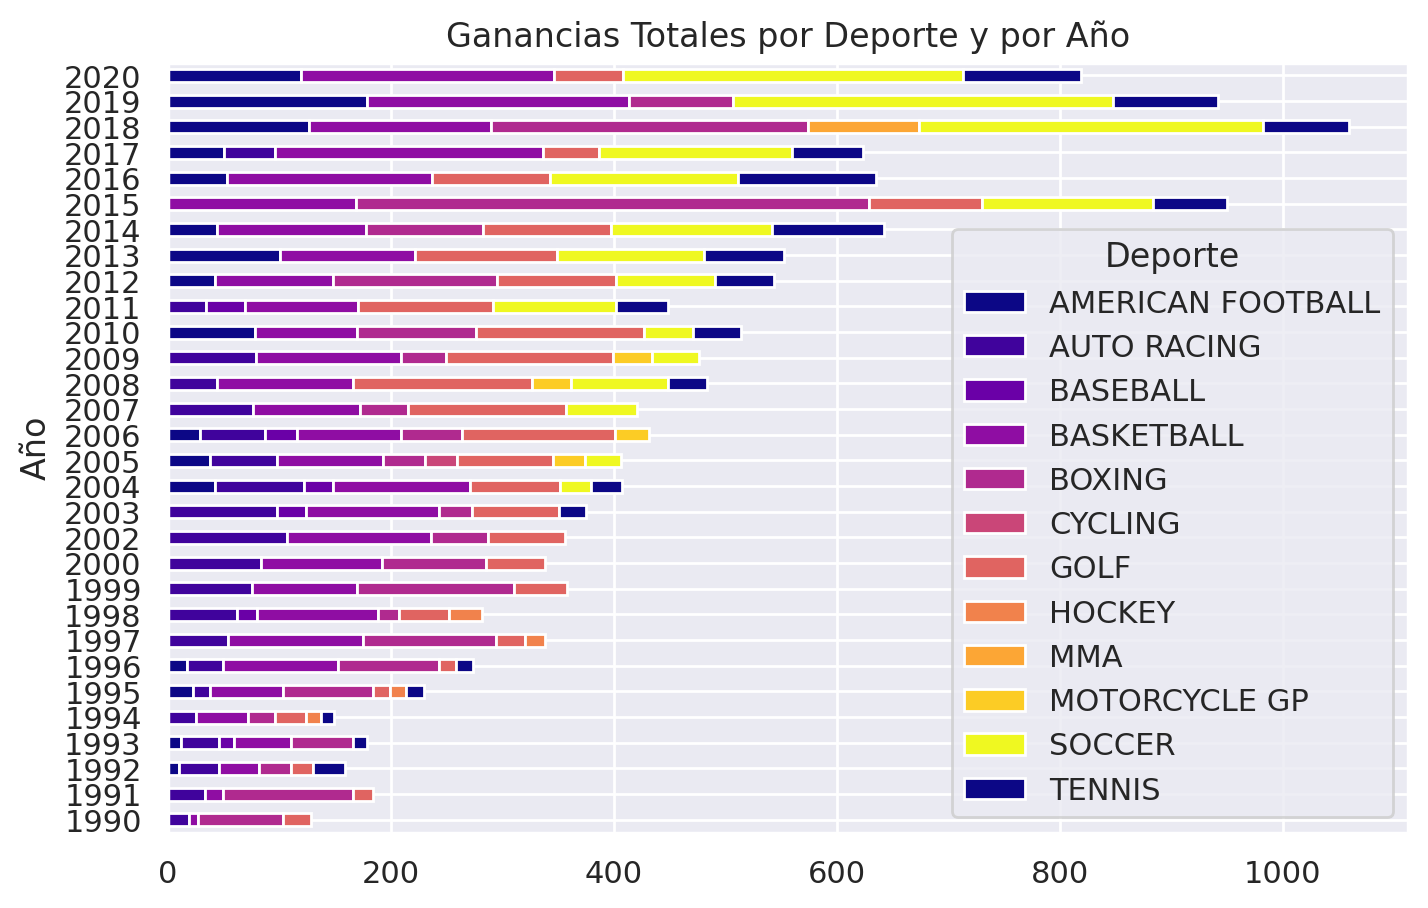

In [ ]:
#Hacemos una gráfica de Barras apiladas
gan_total1.plot(kind='barh', title ='Ganancias Totales por Deporte y por Año', stacked= True, color = Plasma[11])

El año en el que se tuvo mayor ganancia fue en 2018.

Como podemos ver tenemos una gran cantidad de años y deportes por lo que puede llegar a ser complicado diferenciar, por lo que decidimos dividir esa gráfica general en periodos.

## (1990-1999) ganancias totales, por deporte y por año

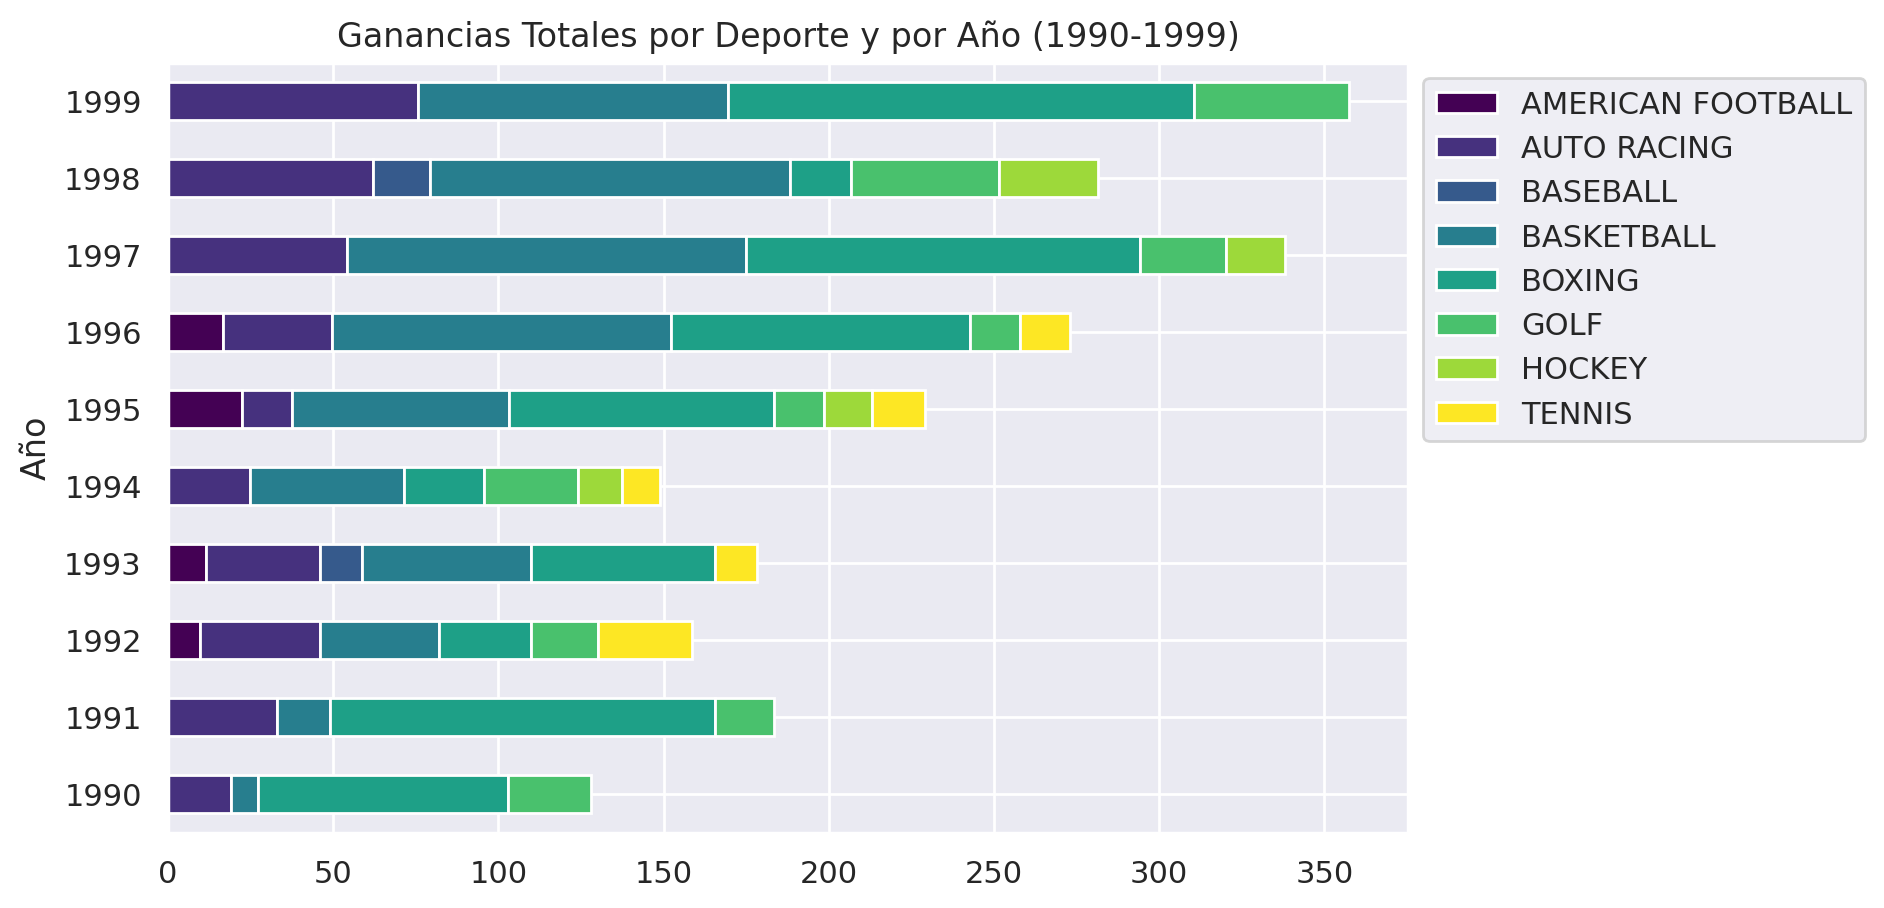

In [ ]:
gan_total90 = gan_total.reset_index()
gan_total90 = gan_total90[gan_total90['Año'] <= 1999]

gan_total90s = pd.pivot_table(gan_total90, columns = "Deporte", index='Año', values='Ganancias')
gan_total90s.fillna(0, inplace = True)

gan_total90s.plot(kind='barh', title ='Ganancias Totales por Deporte y por Año (1990-1999)', stacked= True, color = Viridis[8])
plt.legend(bbox_to_anchor=(1, 1), loc='best')

Los deportes con mayores ganancias fueron basketball y box, sin embargo, en la tabla general, estas aportaciones no son tan significativas como las de los años siguientes.

##(2000-2010) ganancias totales, por deporte y por año

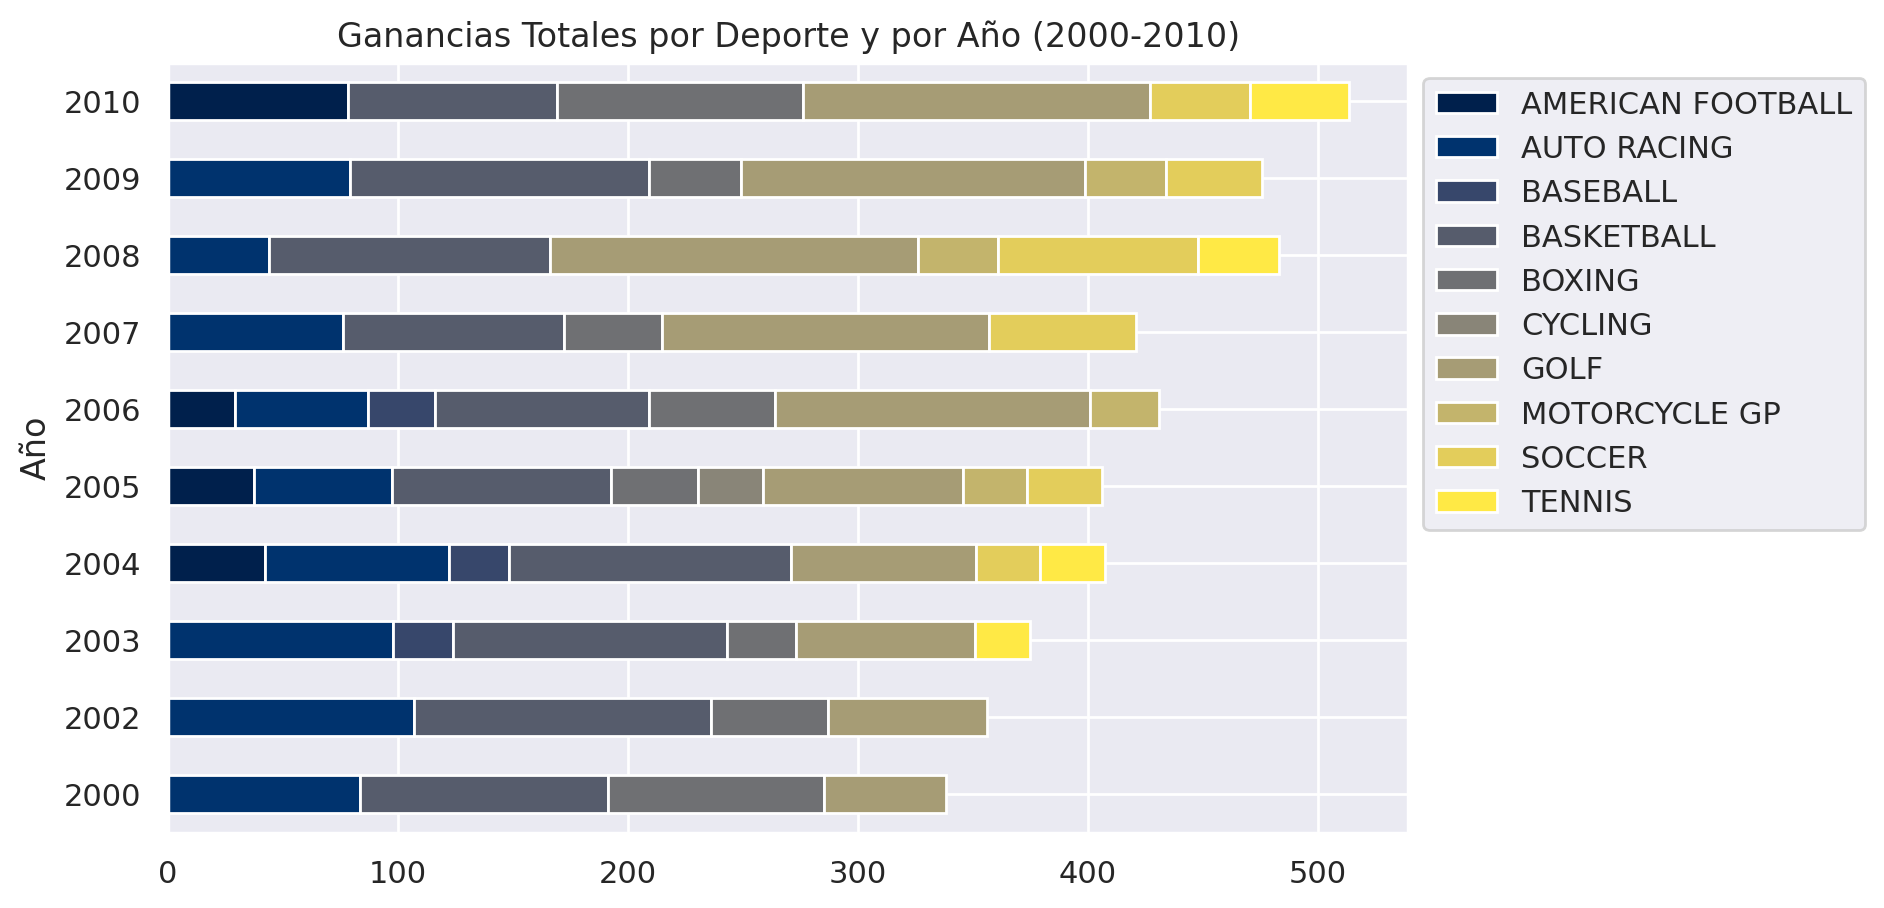

In [ ]:
gan_total00 = gan_total.reset_index()
gan_total00 = gan_total00[(gan_total00['Año'] <= 2010) & (gan_total00['Año'] >= 2000)]

gan_total00s = pd.pivot_table(gan_total00, columns = "Deporte", index='Año', values='Ganancias')
gan_total00s.fillna(0, inplace = True)


gan_total00s.plot(kind='barh', title ='Ganancias Totales por Deporte y por Año (2000-2010)', stacked= True, color = Cividis[10])
plt.legend(bbox_to_anchor=(1, 1), loc='best')

En este periodo los deportes con mayores ganancias fueron el basketball y golf. Comparando con la gráfica anterior podemos ver el ingreso de dos deportes con ganancias destacadas (motorcycle gp y soccer).

##(2011-2020) ganancias totales, por deporte y por año

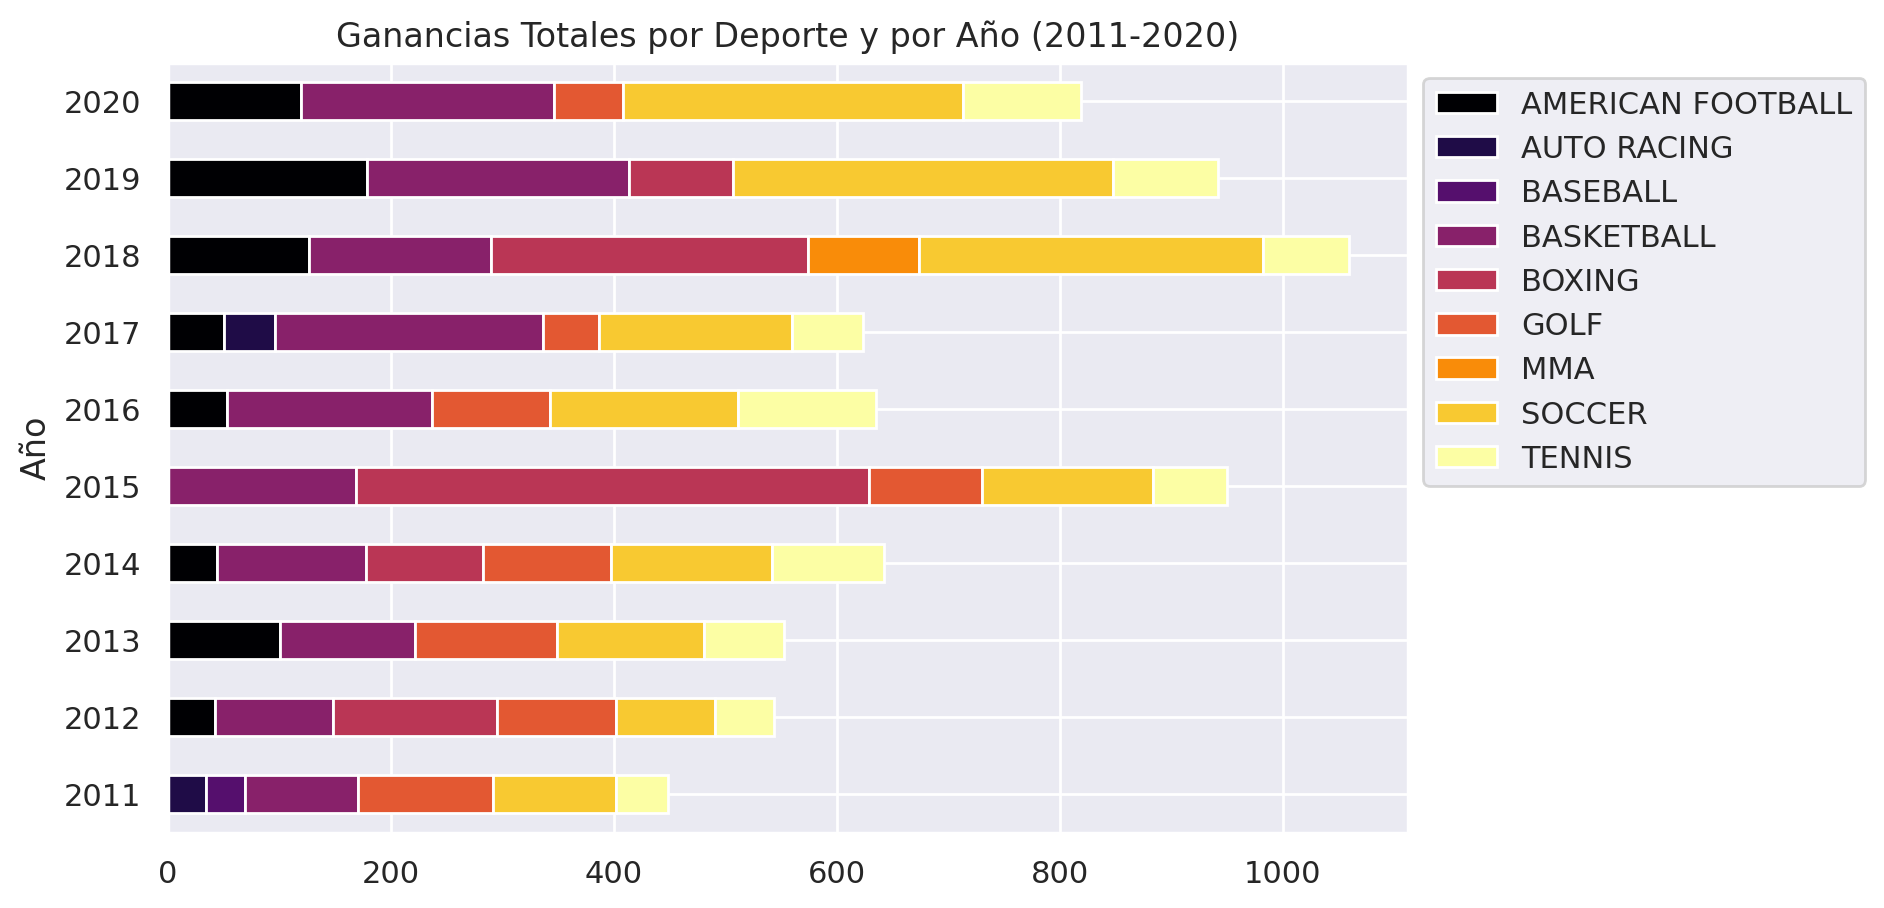

In [ ]:
gan_total11 = gan_total.reset_index()
gan_total11 = gan_total11[(gan_total11['Año'] <= 2020) & (gan_total11['Año'] >= 2011)]

gan_total11s = pd.pivot_table(gan_total11, columns = "Deporte", index='Año', values='Ganancias')
gan_total11s.fillna(0, inplace = True)


gan_total11s.plot(kind='barh', title ='Ganancias Totales por Deporte y por Año (2011-2020)', stacked= True, color=Inferno[9])
plt.legend(bbox_to_anchor=(1, 1), loc='best')

En este última década los deportes con mayores ganancias fueron el soccer y el basquetball. Además podemos destacar que en el 2015 el box representó la mayor parte de las ganancias de este año. Y en la gráfica general este periodo es en donde se han tenido mayores ganancias.